In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

import matplotlib.pyplot as plt

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
from sklearn.preprocessing import MinMaxScaler    # Herramientas de polinomios

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from formulaic import model_matrix
from formulaic import Formula

# Paquetes para clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Ejercicio 2

2. Considere los datasetets p7-data1.csv y p7-data2.csv de datos artificialmente generados.
(a) Abra cada dataset en Python y genere un diagrama de dispersión (scatter plot) para cada
uno.
(b) Analizando los gr´aficos “a mano” considere cu´antos clusters est´an presentes.
(c) Pruebe ejecutar el comando KMeans con la cantidad de clusters que detect´o. Analizar el
comportamiento del procedimiento en cada caso.

In [5]:
data1= pd.read_csv('..\Labo de datos\Datasets\p7-data1.csv')
data2= pd.read_csv('..\Labo de datos\Datasets\p7-data2.csv')
data1.head()

,x,y
0,1.765881,-8.314427
1,6.483456,-3.332369
2,-8.480197,0.067655
3,4.706642,7.349470
4,4.502446,-8.135970


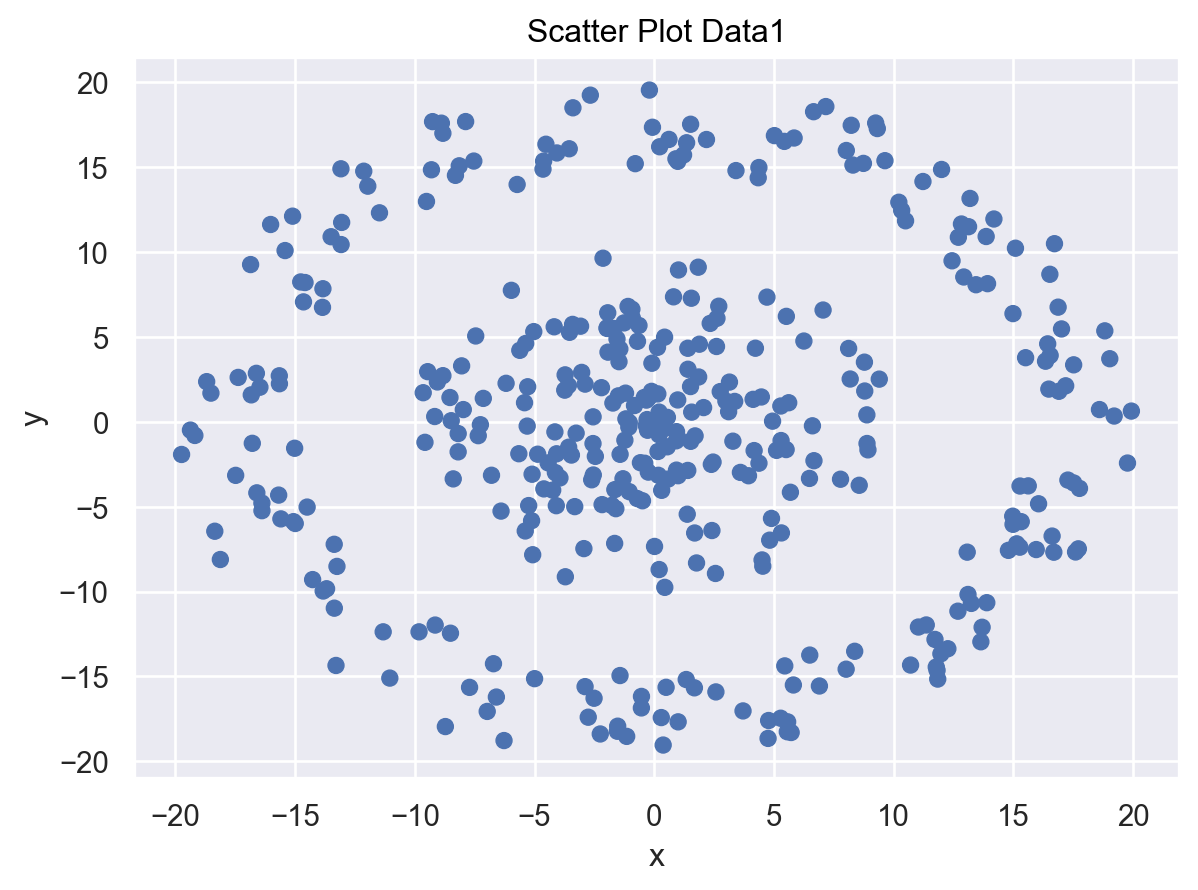

In [10]:
(
    so.Plot(data=data1,x='x',y='y')
    .add(so.Dot())
    .label( title='Scatter Plot Data1')
)

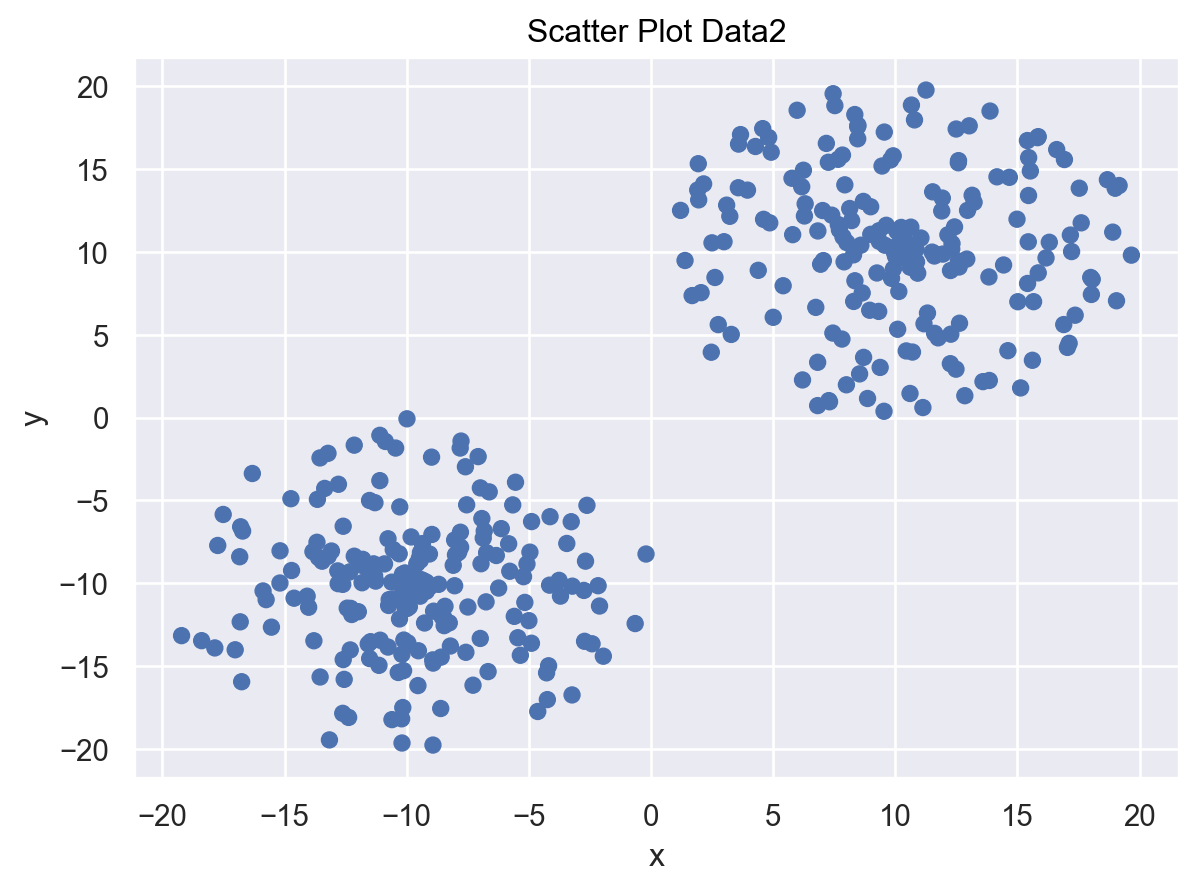

In [11]:
(
    so.Plot(data=data2,x='x',y='y')
    .add(so.Dot())
    .label(title='Scatter Plot Data2')
)

Necesito 2 clusters para cada dataset

In [14]:
kmeans= KMeans(n_clusters=2)
etiquetas_1= kmeans.fit_predict(data1)
etiquetas_2= kmeans.fit_predict(data2)


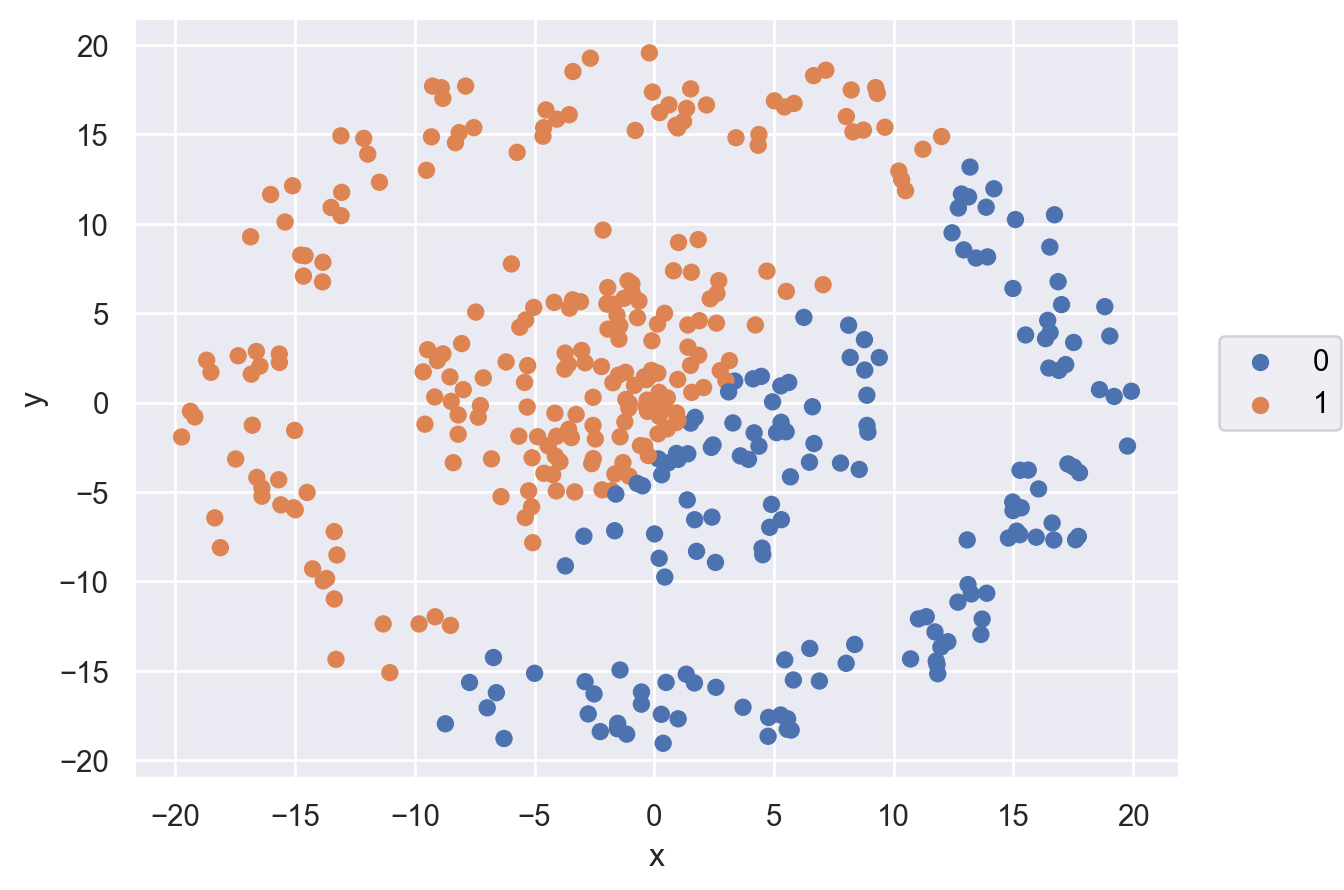

In [17]:
(
    so.Plot(data1,'x','y', color=etiquetas_1.astype(str))
    .add(so.Dot())
)

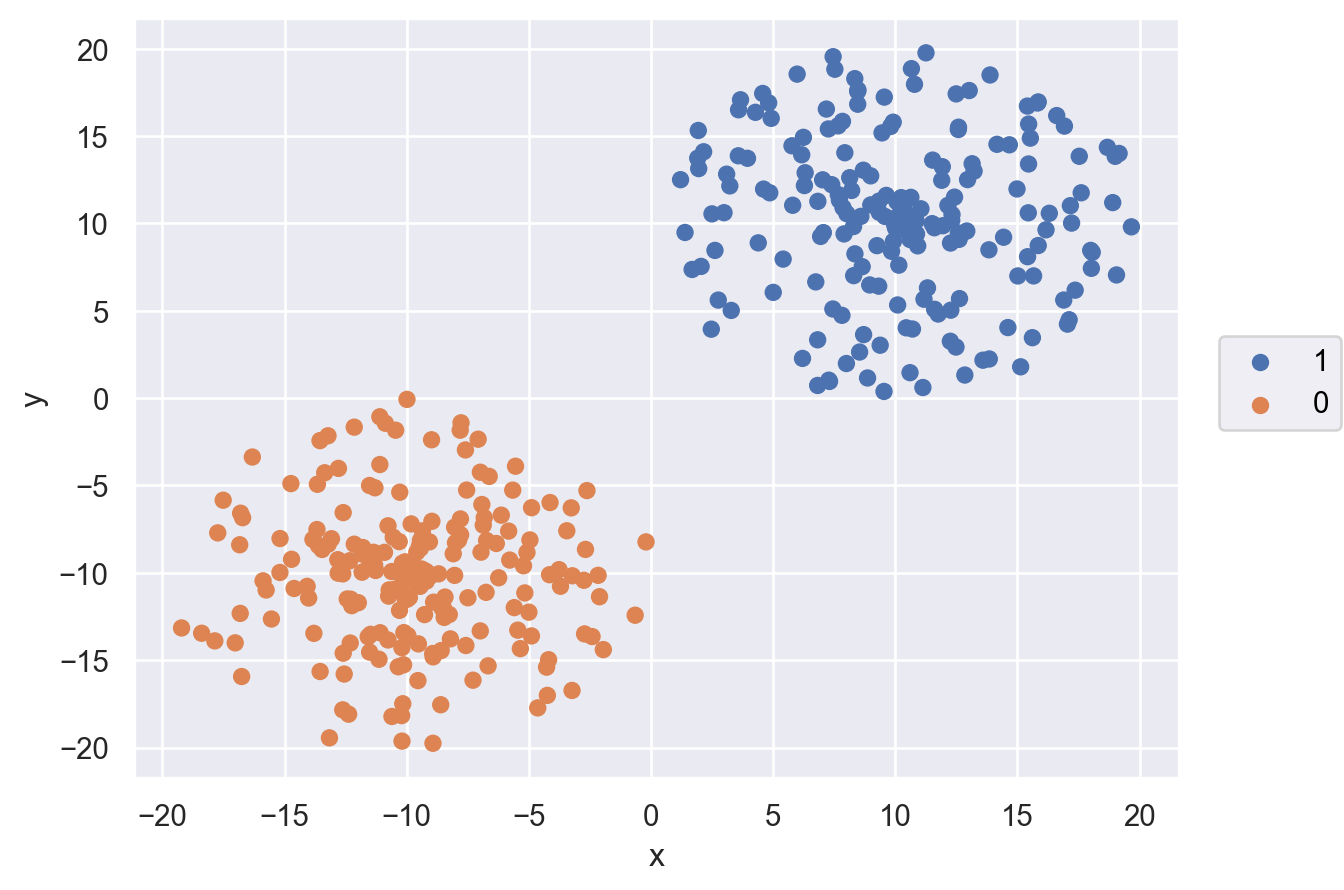

In [19]:
(
    so.Plot(data2,'x','y', color=etiquetas_2.astype(str))
    .add(so.Dot())
)

# Ejercicio 3

Considerar el dataset p7-iris.txt (para leer el archivo, observar que los datos est´an separados
por tabulaciones). En este ejercicio trataremos de identificar las distintas subespecies.

(a) Cargue el archivo p7-iris.txt.


In [22]:
iris= pd.read_csv('..\Labo de datos\Datasets\p7-iris.txt', delimiter='\t')
iris.head()

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(b) Grafique en un diagrama de dispersi´on la longitud del p´etalo vs el ancho del p´etalo.

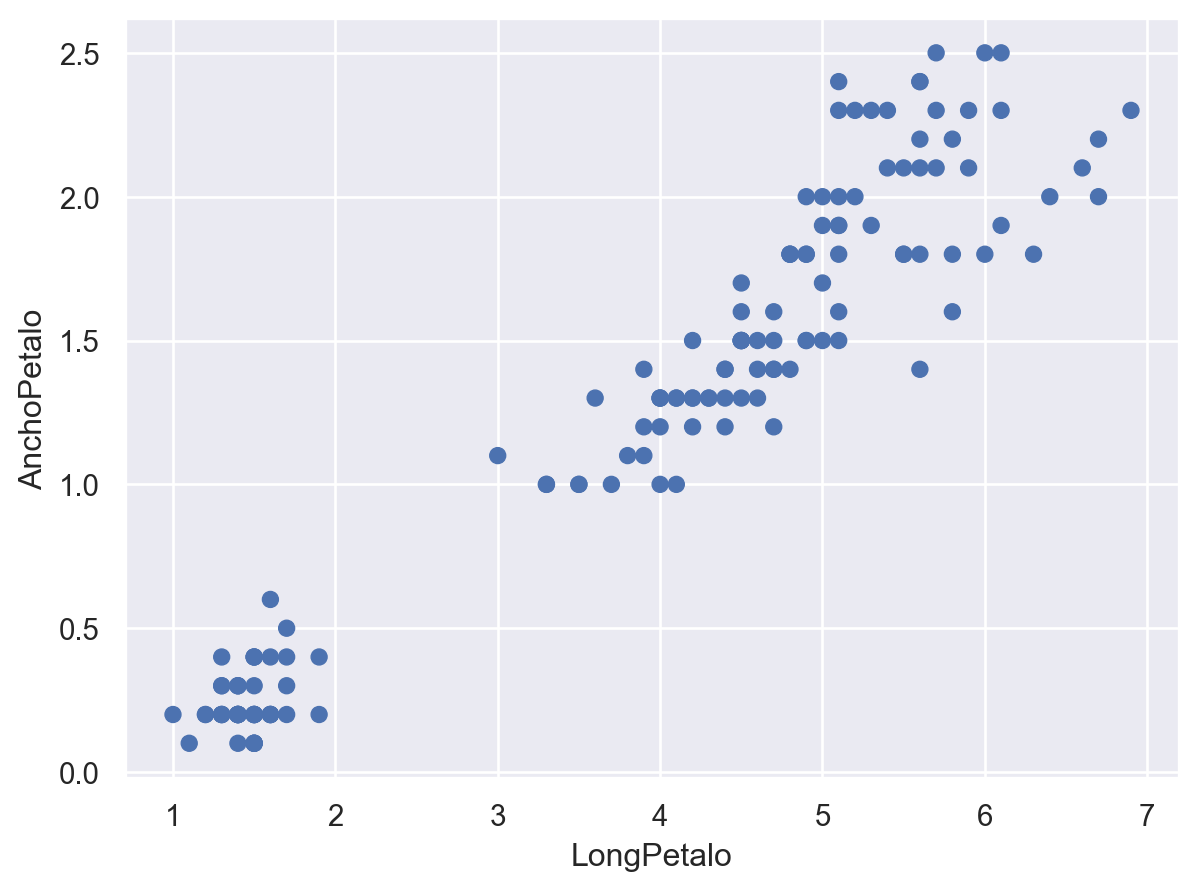

In [23]:
(
    so.Plot(iris,'LongPetalo','AnchoPetalo')
    .add(so.Dot())
)

(c) Efect´ue un clustering k-medias con el comando KMeans de los datos basados en las cuatro
columnas de datos, considere k = 3 clusters.

(d) Repita el inciso b) coloreando en funci´on del ´ındice de cluster obtenido.

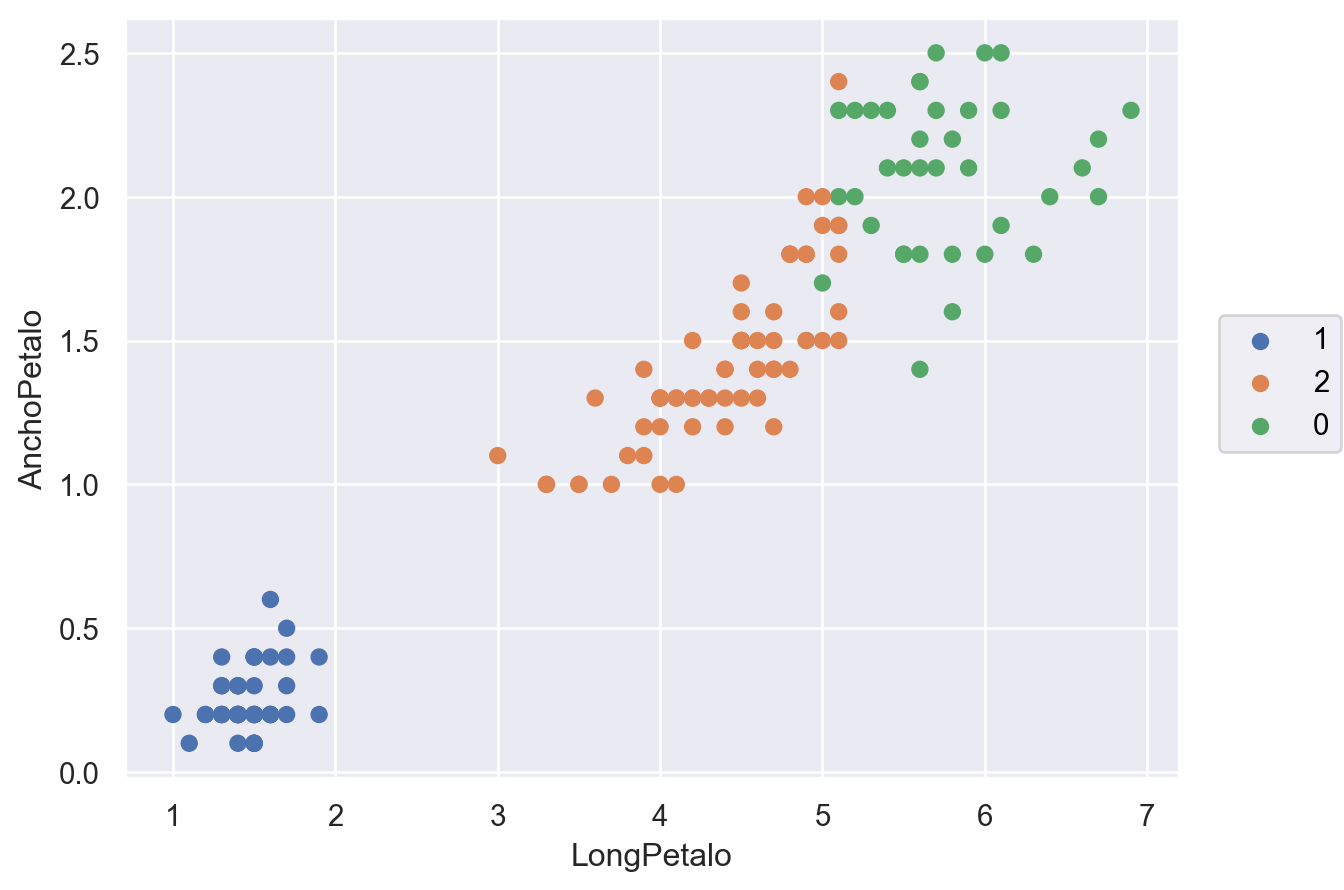

In [25]:
kmeans= KMeans(n_clusters=3)
etiquetas= kmeans.fit_predict(iris)

(
    so.Plot(iris,'LongPetalo','AnchoPetalo', color=etiquetas.astype(str))
    .add(so.Dot())
)

(e) Eval´ue el error de clustering en funci´on de la siguiente f´ormula (within-cluster sum of
squares, WCSS)
Python ofrece una forma de calcular esto de forma directa.
(Mirar el archivo p7-ejercicioPetalos.ipynb.)

In [28]:
kmeans.inertia_

78.940841426146

(f) Repita el ensayo para distintos valores de k, entre 1 y 10, graficando el W CSS para cada
valor de k. Analizar el mejor valor de k posible teniendo en cuenta un compromiso entre
“complejidad” (es decir, cantidad de clusters) y nivel de error (es decir, el WCSS).

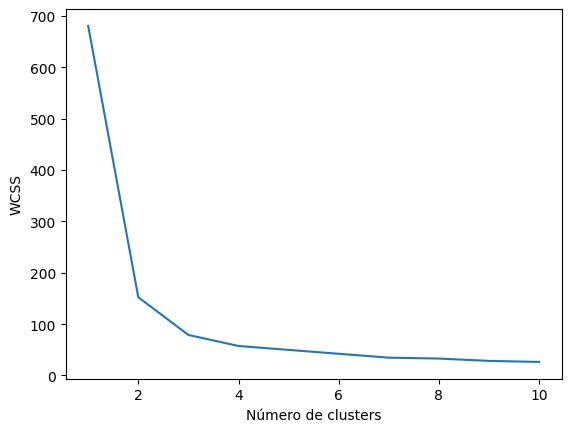

In [30]:
#Lo copiamos del resuelto
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    cluster = kmeans.fit_predict(iris)
    wcss.append(kmeans.inertia_)
    
# Graficamos los resultados en un gráfico, y observamos en qué valor de k se da el "codo"
plt.plot(range(1, 11), wcss)

plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # within cluster sum of squares (suma de cuadrados en cada cluster)
plt.show()

# Ejercicio 4

Consideremos el dataset de datos artificiales p7-dataSinEscalar.csv.

(a) Cargar los datos y graf´ıcarlos.

In [42]:
data4= pd.read_csv('..\Labo de datos\Datasets\p7-dataSinEscalar.csv')
data4= data4.rename(columns={' y': 'y'})
data4.head()

,x,y
0,0.002501,6488.26703
1,-0.026980,2521.94722
2,-0.029001,3068.77291
3,0.007030,4314.27482
4,-0.025356,2384.49945


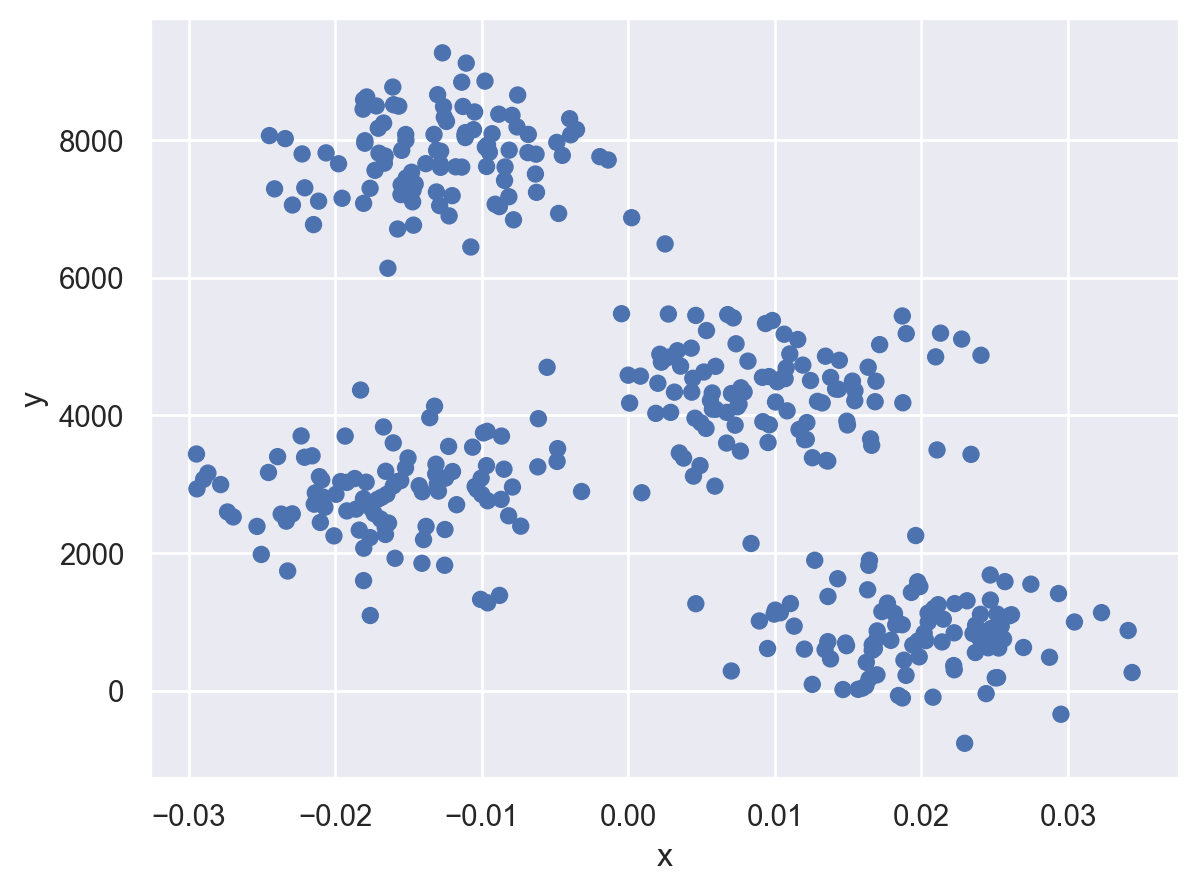

In [43]:
(
    so.Plot(data4,x='x',y='y')
    .add(so.Dot())
)

(b) A priori y mirando el gr´afico, determine la cantidad de clusters que puede detectar en los
mismos e imagine inicialmente c´omo debieran ser esos clusters.

(c) Realizar un clustering k-medias con el valor de k antes determinado.

(d) ¿Considera satisfactorio el clustering obtenido? ¿Representa lo que usted esperaba?

Deberian ser 4 clusters

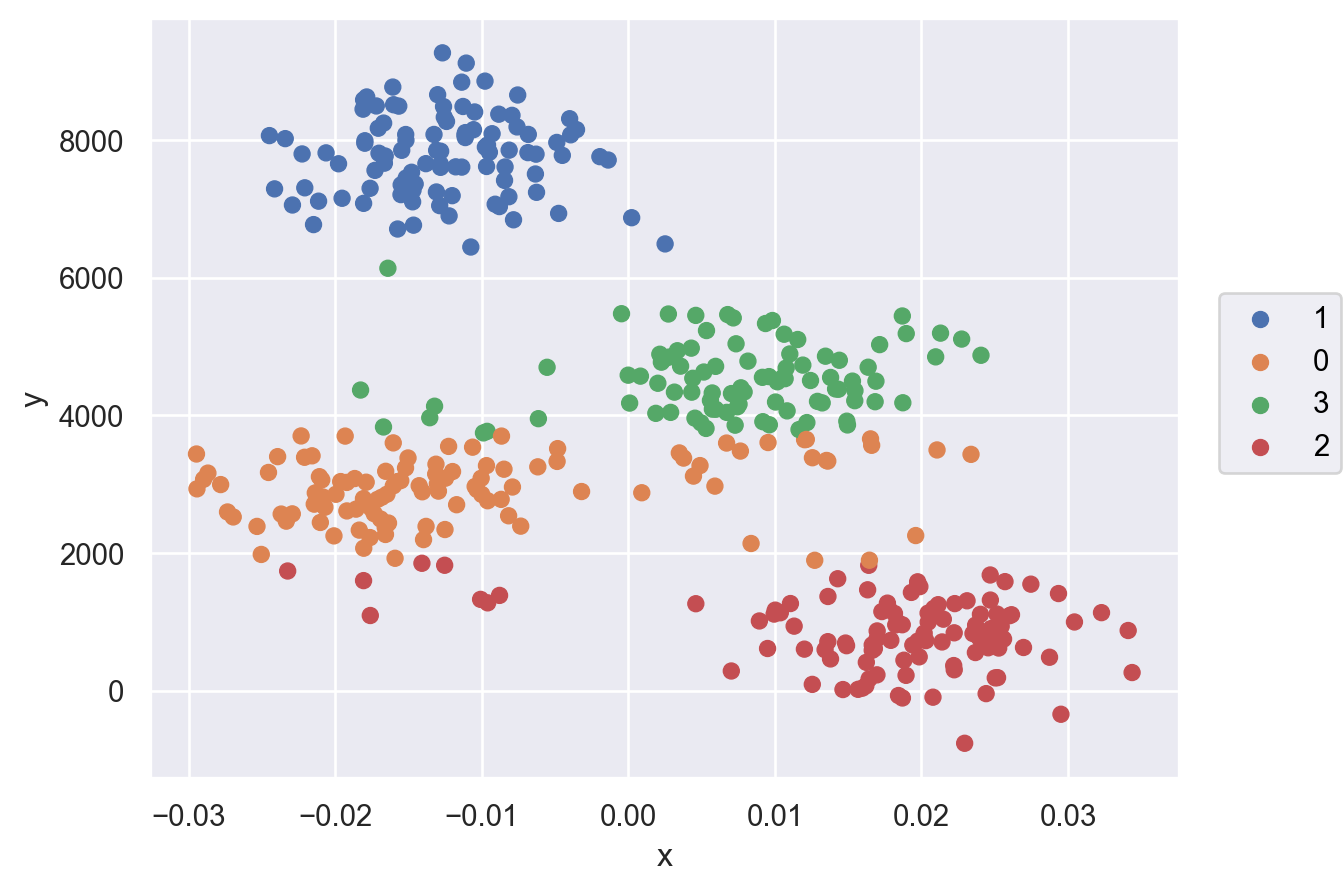

In [44]:
kmeans= KMeans(n_clusters=4)
etiquetas= kmeans.fit_predict(data4)
(
    so.Plot(data4, 'x','y', color=etiquetas.astype(str))
    .add(so.Dot())
)

Esta bastante mal

(e) Uno de los problemas que tenemos es que el m´etodo de k-medias es muy sensible a las
diferencias de escala entre las dimensiones. Una forma de corregir eso es re-escalando las
variables de forma tal que todas se muevan en el mismo rango. Por ejemplo, podemos
conseguir eso efectuando una normalizaci´on como sigue:

Xij =Xij − min(X·j )max(X·j ) − min(X·j )

De esta manera, logramos que los datos de cada columna caigan entre 0 y 1. Normalice
los datos siguiendo este criterio.
(Mirar en Python el comando MinMaxScaler)

(f) Vuelva a correr el procedimiento de clustering, tome las etiquetas de clustering obtenidos
y grafique los datos originales con un color que dependa del clustering obtenido con los
datos escalados

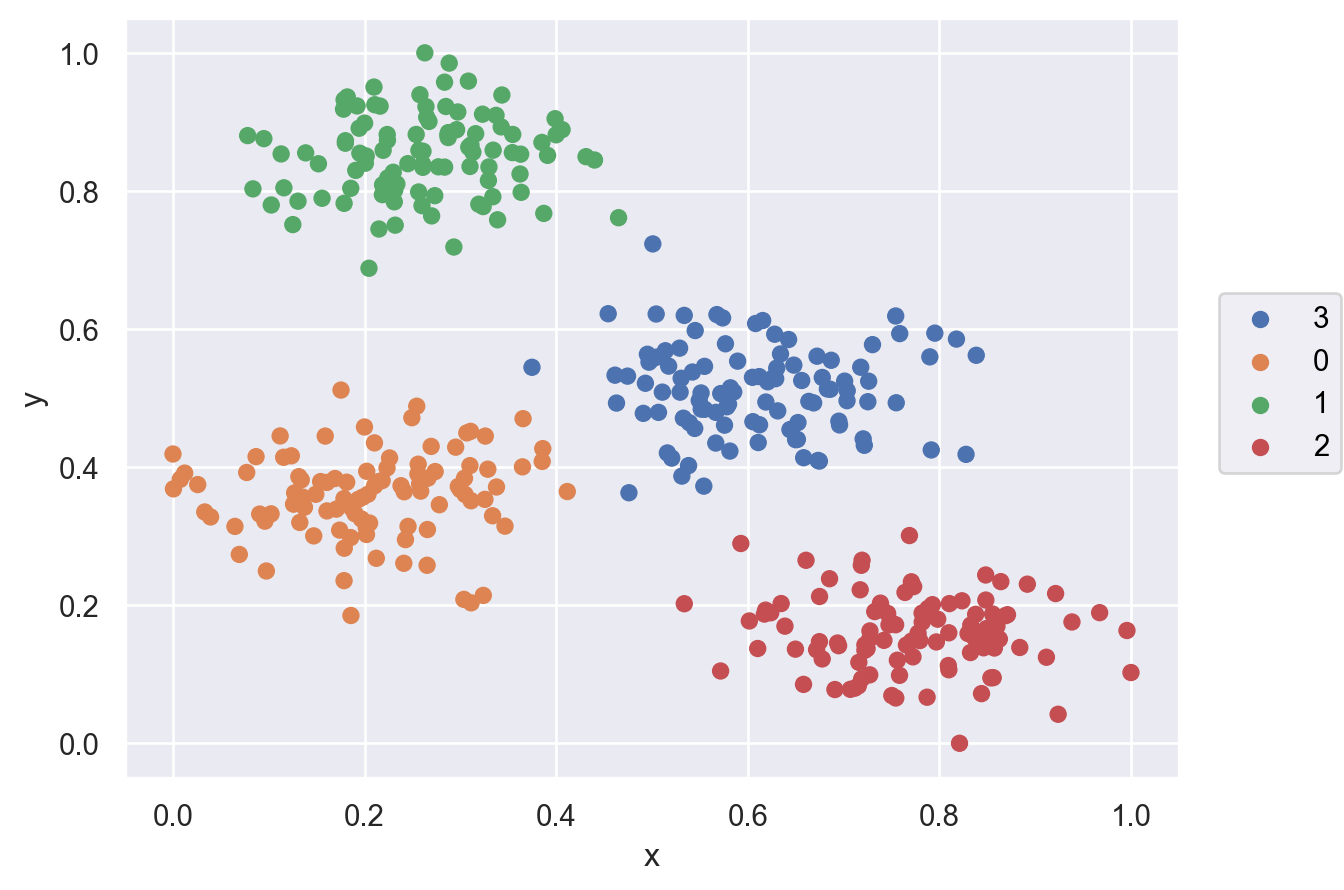

In [48]:
scaler= MinMaxScaler().set_output(transform='pandas')
data = scaler.fit_transform(X=data4)
cluster= kmeans.fit_predict(data)
(
    so.Plot()
    .add(so.Dot(), data= data, x='x', y='y', color=cluster.astype(str))
)

# Ejercicio 5

Implementar el algoritmo DBSCAN para analizar los sets de datos anteriores. Comparar los resultados con los obtenidos usando k-medias.

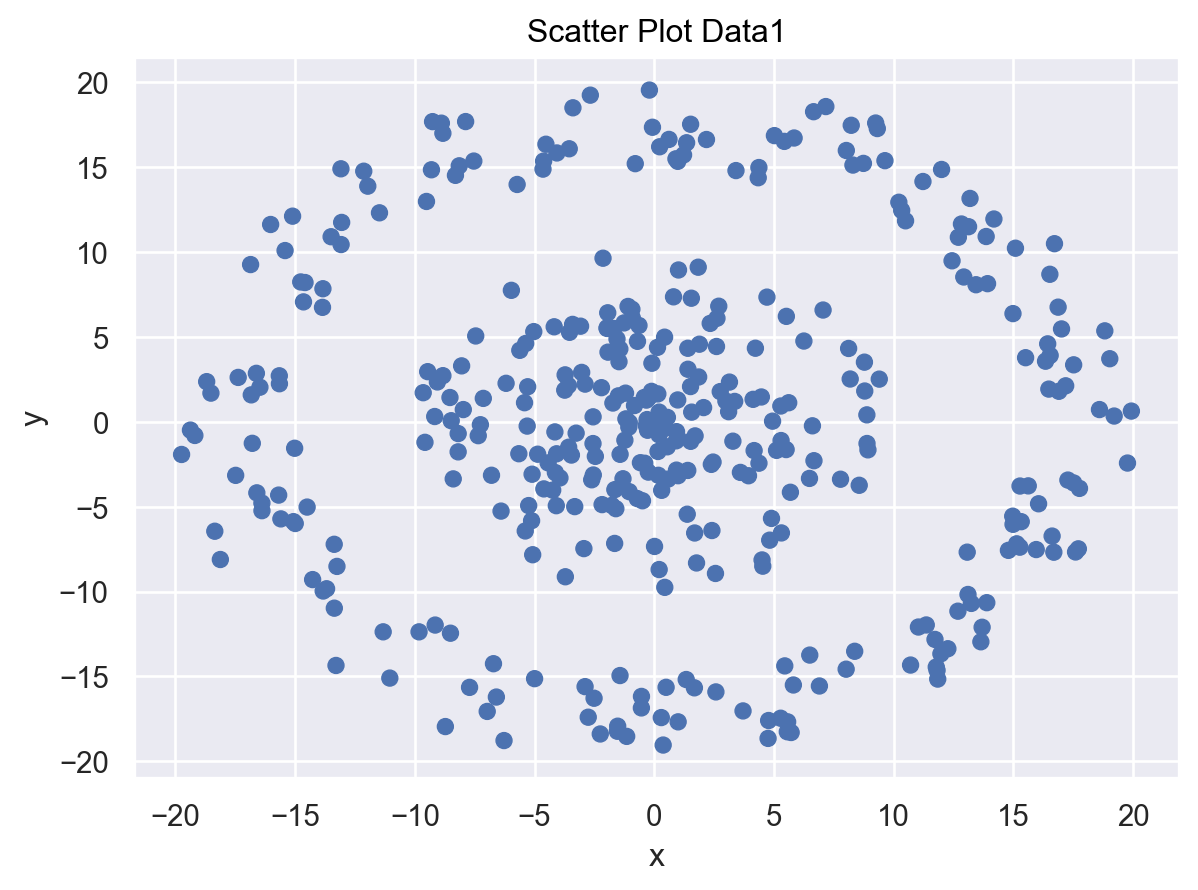

In [49]:
(
    so.Plot(data=data1,x='x',y='y')
    .add(so.Dot())
    .label( title='Scatter Plot Data1')
)

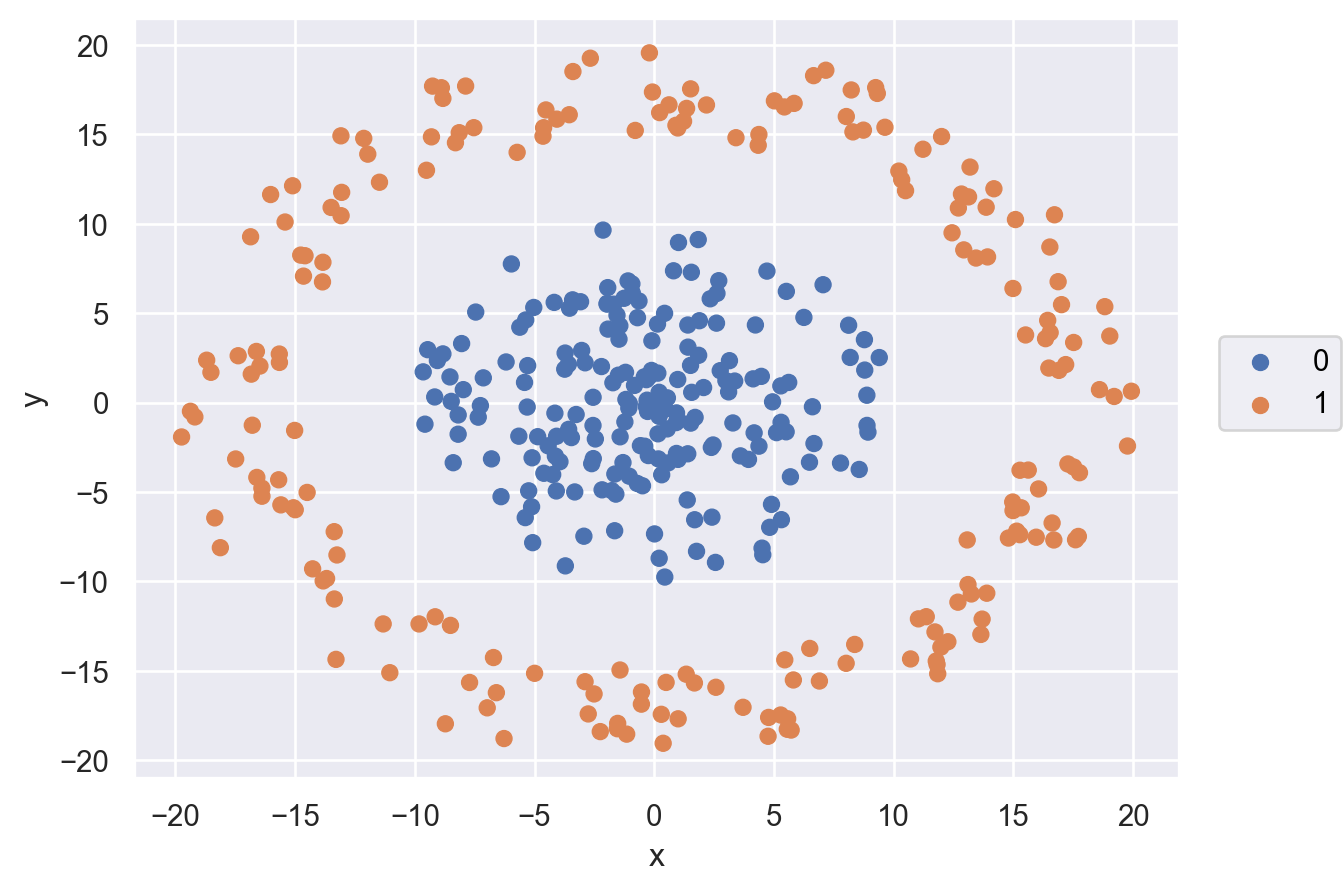

In [53]:
clustering = DBSCAN(eps= 5,min_samples=2)
etiquetas= clustering.fit_predict(data1)
(
    so.Plot(data1,'x','y', color= etiquetas.astype(str))
    .add(so.Dot())
)

# Ejercicio 6

Implementar un clasificador de k-NN que prediga el sexo de los ping¨uinos utilizando como
variables a el largo del pico y el largo de la aleta. Hacerlo para diferentes valores de k (impares)
y evaluar el error de predicci´on en cada caso. ¿C´omo elegir´ıa el valor de k ´optimo?

In [13]:
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


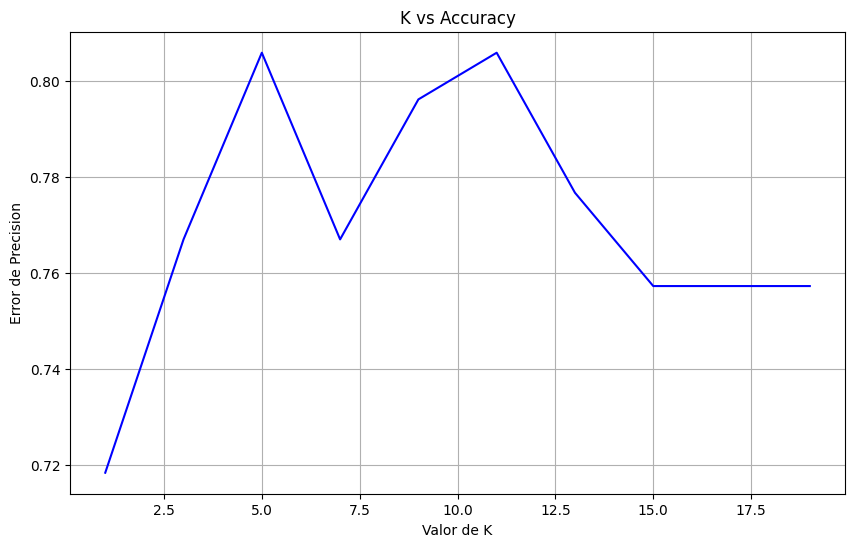

In [28]:
#Importamos el dataset
peng = sns.load_dataset('penguins')

#Convertimos la variable 'sex' a numerica
peng['sex']=[1 if peng['sex'][x]=='Male' else 0 for x in peng.index]

#Eliminamos los datos Nan
peng= peng.dropna()

#Elijo las variables predictoras y la variable a predecir
X=peng[['bill_depth_mm','flipper_length_mm']]
y=peng['sex']

#Escalo mis datos
X = MinMaxScaler().set_output(transform='pandas').fit_transform(X)

#Divido en train y test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#Hago KNN y evaluo el error en prediccion
valores_k = range(1,20,2)
accuracies=[]

for k in valores_k :
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_pred))

#Graficamos el error de precision
plt.figure(figsize=(10,6))
plt.plot(valores_k,accuracies,color="blue")
plt.title("K vs Accuracy")
plt.xlabel("Valor de K")
plt.ylabel("Error de Precision")
plt.grid(True)
plt.show()


In [29]:
#Elegimos el mejor k
mejor_k= valores_k[accuracies.index(max(accuracies))]
print("El valor optimo de k es:", mejor_k)

El valor optimo de k es: 5


# Ejercicio 7

Implementar un clasificador de k-NN que prediga la especie de los ping¨uinos. Pueden elegir las
variables. ¿Con cu´ales variables obtienen mejores resultados?
Reportar los resultados con visualizaciones adecuadas.